In [ ]:
#TASK 1 - Install matplotlib and deap
#       - Import all necessary libraries



In [1]:
#SOLUTION
!pip install matplotlib deap

# Required Libraries
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 3.3 MB/s eta 0:00:00


In [2]:
#SOLUTION

num_locations = 26 # Define how many locations (excluding the depot) the vehicles need to visit
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]  # Generate random (x, y) coordinates for each location
depot = (50, 50)  # Define the central depot location as a fixed point
num_vehicles = 3  # Define how many vehicles are available to visit the locations

In [3]:
#SOLUTION - TASK 3 and 4

# Genetic Algorithm Setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))  # Define fitness function to minimize. The two objectives are total distance and balance penalty.
creator.create("Individual", list, fitness=creator.FitnessMin)  # Define individual structure. Individuals are lists with a fitness attribute.

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)  # Function to generate a list of unique, randomly ordered location indices
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)  # Function to create an individual as a shuffled list of location indices
toolbox.register("population", tools.initRepeat, list, toolbox.individual)  # Function to create a population of individuals


In [4]:

#Fitness Function
def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):

        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]

        # Calculate total distance traveled by this vehicle
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))

        total_distance += vehicle_distance
        distances.append(vehicle_distance)

    balance_penalty = np.std(distances)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty

toolbox.register("evaluate", evalVRP)

In [5]:

toolbox.register("mate", tools.cxPartialyMatched)  # Register the crossover function suitable for permutation-based representation
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)  # Register the mutation function to shuffle indices with a 5% chance per index
toolbox.register("select", tools.selTournament, tournsize=3)  # Register the selection function using tournament selection

In [6]:
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-', 'rs')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

gen	nevals	avg    	min     
0  	300   	473.157	0.839706
1  	223   	458.589	6.49461 
2  	239   	453.41 	3.63483 
3  	241   	447.479	3.66692 
4  	215   	435.13 	1.495   
5  	222   	431.37 	0.747201
6  	231   	427.975	1.495   
7  	229   	427.708	0.911103
8  	232   	428.913	1.495   
9  	224   	423.645	1.495   
10 	240   	416.289	4.2493  
11 	233   	412.194	3.54247 
12 	226   	411.595	1.495   
13 	233   	402.787	1.49379 
14 	223   	405.564	2.8002  
15 	226   	402.687	2.8002  
16 	233   	399.638	2.8002  
17 	231   	384.149	2.8002  
18 	237   	378.694	2.8002  
19 	237   	377.24 	1.73778 
20 	238   	355.258	3.19486 
21 	234   	328.673	4.43659 
22 	243   	307.279	7.02921 
23 	229   	298.698	6.98277 
24 	229   	297.698	2.02389 
25 	227   	291.183	8.06868 
26 	238   	298.066	6.09    
27 	242   	291.961	2.85488 
28 	253   	289.743	4.55657 
29 	238   	276.045	4.85765 
30 	238   	269.257	3.15615 
31 	213   	260.225	2.06404 
32 	223   	258.752	0.769652
33 	231   	255.167	0.769652
34 	231   	254.791	0

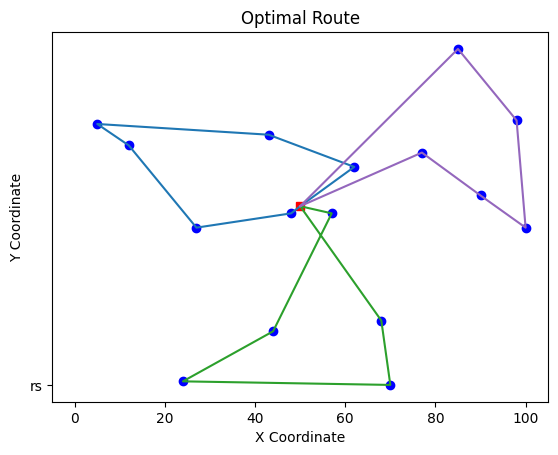

In [7]:
# Running the Genetic Algorithm
# Running the Genetic Algorithm
def main():
    random.seed(42)  # Seed for reproducibility
    pop = toolbox.population(n=300)  # Generate initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

if __name__ == "__main__":
    main()

In [ ]:
# Additional Tasks for the Vehicle Routing Project (Optional but highly recommended)

# 1. Parameter Tuning:
# Task: Vary parameters like population size, mutation rate, or tournament size. Analyze their impact on the results.
# Purpose: Learn the importance of parameter tuning in genetic algorithms and how it affects outcomes.

# 2. Fitness Score Analysis Over Generations:
# Task: Plot the fitness score of the best individual over generations for different configurations.
# Purpose: Visualize and understand the convergence behavior of the algorithm under different settings.

# 3. Solution Diversity Analysis:
# Task: Implement a method to measure and report the diversity of solutions in the population over time.
# Purpose: Explore the balance between exploration and exploitation in genetic algorithms.